In [2]:
# Import necessary libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
import sklearn
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from sklearn.decomposition import IncrementalPCA

from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

In [4]:
#Read the dataset
churn_df=pd.read_csv(r'C:\Users\nikhi\Downloads\New_Telecom_Churn Case Study\telecom_churn_data.csv')

In [5]:
churn_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [38]:
print(churn_df.shape)
print('*'*20)
print(churn_df.info())

(99999, 226)
********************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB
None


In [39]:
churn_df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [43]:
for col in churn_df.columns:
    print(col)

mobile_number
circle_id
loc_og_t2o_mou
std_og_t2o_mou
loc_ic_t2o_mou
last_date_of_month_6
last_date_of_month_7
last_date_of_month_8
last_date_of_month_9
arpu_6
arpu_7
arpu_8
arpu_9
onnet_mou_6
onnet_mou_7
onnet_mou_8
onnet_mou_9
offnet_mou_6
offnet_mou_7
offnet_mou_8
offnet_mou_9
roam_ic_mou_6
roam_ic_mou_7
roam_ic_mou_8
roam_ic_mou_9
roam_og_mou_6
roam_og_mou_7
roam_og_mou_8
roam_og_mou_9
loc_og_t2t_mou_6
loc_og_t2t_mou_7
loc_og_t2t_mou_8
loc_og_t2t_mou_9
loc_og_t2m_mou_6
loc_og_t2m_mou_7
loc_og_t2m_mou_8
loc_og_t2m_mou_9
loc_og_t2f_mou_6
loc_og_t2f_mou_7
loc_og_t2f_mou_8
loc_og_t2f_mou_9
loc_og_t2c_mou_6
loc_og_t2c_mou_7
loc_og_t2c_mou_8
loc_og_t2c_mou_9
loc_og_mou_6
loc_og_mou_7
loc_og_mou_8
loc_og_mou_9
std_og_t2t_mou_6
std_og_t2t_mou_7
std_og_t2t_mou_8
std_og_t2t_mou_9
std_og_t2m_mou_6
std_og_t2m_mou_7
std_og_t2m_mou_8
std_og_t2m_mou_9
std_og_t2f_mou_6
std_og_t2f_mou_7
std_og_t2f_mou_8
std_og_t2f_mou_9
std_og_t2c_mou_6
std_og_t2c_mou_7
std_og_t2c_mou_8
std_og_t2c_mou_9
std_og_mou_

### Data Pre-Processing 

#### Handling Missing Values

In [8]:
# Checking for columns containing more than 30% of null values

cols_to_drop=[]

for col in churn_df.columns:
    null_count=round(churn_df[col].isnull().sum()/churn_df.shape[0],2)*100
    if(null_count>30):
        cols_to_drop.append(col)
        print(col+' - '+str(null_count))

date_of_last_rech_data_6 - 75.0
date_of_last_rech_data_7 - 74.0
date_of_last_rech_data_8 - 74.0
date_of_last_rech_data_9 - 74.0
total_rech_data_6 - 75.0
total_rech_data_7 - 74.0
total_rech_data_8 - 74.0
total_rech_data_9 - 74.0
max_rech_data_6 - 75.0
max_rech_data_7 - 74.0
max_rech_data_8 - 74.0
max_rech_data_9 - 74.0
count_rech_2g_6 - 75.0
count_rech_2g_7 - 74.0
count_rech_2g_8 - 74.0
count_rech_2g_9 - 74.0
count_rech_3g_6 - 75.0
count_rech_3g_7 - 74.0
count_rech_3g_8 - 74.0
count_rech_3g_9 - 74.0
av_rech_amt_data_6 - 75.0
av_rech_amt_data_7 - 74.0
av_rech_amt_data_8 - 74.0
av_rech_amt_data_9 - 74.0
arpu_3g_6 - 75.0
arpu_3g_7 - 74.0
arpu_3g_8 - 74.0
arpu_3g_9 - 74.0
arpu_2g_6 - 75.0
arpu_2g_7 - 74.0
arpu_2g_8 - 74.0
arpu_2g_9 - 74.0
night_pck_user_6 - 75.0
night_pck_user_7 - 74.0
night_pck_user_8 - 74.0
night_pck_user_9 - 74.0
fb_user_6 - 75.0
fb_user_7 - 74.0
fb_user_8 - 74.0
fb_user_9 - 74.0


In [9]:
#These columns have more than 30% null values. As imputing values to these attriubutes alter the dataset, we prefer to delete them
churn_df.drop(cols_to_drop,axis=1,inplace=True)

-- We have removed columns which have more than 30% of values as null and the shape of the dataframe is shown below.

In [63]:
churn_df.shape

(99999, 186)

--To filter high value customers, we need to calculate the amount of recharge done by customers in the month of June and July as this is considered as Good phase.

In [10]:
# We create a new column by taking averagerecharge amount of 6th and 7th months for respective customer.

churn_df['total_rech_amt_6_7']=(churn_df['total_rech_amt_6']+churn_df['total_rech_amt_7'])/2

In [11]:
threshold=churn_df['total_rech_amt_6_7'].quantile(0.7)
threshold

368.5

In [12]:
hv_cust_df=churn_df[churn_df['total_rech_amt_6_7']>=threshold]
hv_cust_df.shape

# After taking average recharge amount of each customer and filtrering them based on 70th percentile value, we get 30k records. 

(30011, 187)

-- There are records with more than 50% of values as null values. Filtering out those records.

In [13]:
null_50=hv_cust_df[hv_cust_df.isnull().sum(axis=1)>hv_cust_df.shape[1]//2]
null_50.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_6_7
2185,7000237332,109,NaN,NaN,NaN,6/30/2014,7/31/2014,8/31/2014,9/30/2014,386.514,...,0,0,0,0,882,172.71,657.55,9.22,0.0,455.0
3506,7002324263,109,NaN,NaN,NaN,6/30/2014,NaN,NaN,NaN,996.558,...,0,0,0,0,2033,0.00,0.00,0.00,0.0,437.5
4190,7000293582,109,NaN,NaN,NaN,6/30/2014,NaN,NaN,NaN,2502.516,...,0,0,0,0,266,0.00,0.00,303.54,0.0,1277.5
5220,7000635396,109,NaN,NaN,NaN,6/30/2014,7/31/2014,8/31/2014,9/30/2014,427.619,...,0,0,0,0,1112,0.00,0.00,0.00,0.0,378.0
5539,7001126462,109,NaN,NaN,NaN,6/30/2014,7/31/2014,8/31/2014,9/30/2014,249.000,...,0,0,0,0,3057,0.00,0.00,0.00,0.0,549.0


In [14]:
# Here we have deleted all the rows that have more than 50% of data in them as null values. There were total of 114 rows.

hv_cust_df.drop(null_50.index,inplace=True)

In [15]:
hv_cust_df.shape

(29897, 187)

In [16]:
# Looking for attributes with null values

null_columns=[]
for cols in hv_cust_df.columns:
    null_count=round(hv_cust_df[cols].isnull().sum()/len(hv_cust_df),2)
    
    if(null_count>0):
        null_columns.append(cols)
        print(cols+' - '+str(null_count))

last_date_of_month_9 - 0.01
onnet_mou_6 - 0.01
onnet_mou_7 - 0.01
onnet_mou_8 - 0.03
onnet_mou_9 - 0.05
offnet_mou_6 - 0.01
offnet_mou_7 - 0.01
offnet_mou_8 - 0.03
offnet_mou_9 - 0.05
roam_ic_mou_6 - 0.01
roam_ic_mou_7 - 0.01
roam_ic_mou_8 - 0.03
roam_ic_mou_9 - 0.05
roam_og_mou_6 - 0.01
roam_og_mou_7 - 0.01
roam_og_mou_8 - 0.03
roam_og_mou_9 - 0.05
loc_og_t2t_mou_6 - 0.01
loc_og_t2t_mou_7 - 0.01
loc_og_t2t_mou_8 - 0.03
loc_og_t2t_mou_9 - 0.05
loc_og_t2m_mou_6 - 0.01
loc_og_t2m_mou_7 - 0.01
loc_og_t2m_mou_8 - 0.03
loc_og_t2m_mou_9 - 0.05
loc_og_t2f_mou_6 - 0.01
loc_og_t2f_mou_7 - 0.01
loc_og_t2f_mou_8 - 0.03
loc_og_t2f_mou_9 - 0.05
loc_og_t2c_mou_6 - 0.01
loc_og_t2c_mou_7 - 0.01
loc_og_t2c_mou_8 - 0.03
loc_og_t2c_mou_9 - 0.05
loc_og_mou_6 - 0.01
loc_og_mou_7 - 0.01
loc_og_mou_8 - 0.03
loc_og_mou_9 - 0.05
std_og_t2t_mou_6 - 0.01
std_og_t2t_mou_7 - 0.01
std_og_t2t_mou_8 - 0.03
std_og_t2t_mou_9 - 0.05
std_og_t2m_mou_6 - 0.01
std_og_t2m_mou_7 - 0.01
std_og_t2m_mou_8 - 0.03
std_og_t2m_mou_9

In [305]:
print(null_columns)

['last_date_of_month_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2t_mou_9', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2m_mou_9', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2f_mou_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_og_mou

In [17]:
for column in null_columns:
    temp=hv_cust_df[hv_cust_df[column].isnull()]
    hv_cust_df.drop(temp.index,inplace=True)

-- We have deleted the rows which contain null values. Imputing null values for all 120 columns is not an easy task. Moreover the percentage of null values in each column is very less.
            The number of rows that have been deleted is 6% of the entire dataset.

In [18]:
hv_cust_df.shape

(27463, 187)

In [19]:
for column in hv_cust_df.columns:
    print(hv_cust_df[column].value_counts(normalize=True))
    print('*'*25)

7001524846    0.000036
7002184183    0.000036
7001071554    0.000036
7000888840    0.000036
7000721071    0.000036
                ...   
7001845362    0.000036
7001347294    0.000036
7001832004    0.000036
7002096616    0.000036
7000498689    0.000036
Name: mobile_number, Length: 27463, dtype: float64
*************************
109    1.0
Name: circle_id, dtype: float64
*************************
0.0    1.0
Name: loc_og_t2o_mou, dtype: float64
*************************
0.0    1.0
Name: std_og_t2o_mou, dtype: float64
*************************
0.0    1.0
Name: loc_ic_t2o_mou, dtype: float64
*************************
6/30/2014    1.0
Name: last_date_of_month_6, dtype: float64
*************************
7/31/2014    1.0
Name: last_date_of_month_7, dtype: float64
*************************
8/31/2014    1.0
Name: last_date_of_month_8, dtype: float64
*************************
9/30/2014    1.0
Name: last_date_of_month_9, dtype: float64
*************************
0.000       0.001711
311.292     0.

0.00     0.461676
0.53     0.002294
0.33     0.002294
0.38     0.002221
0.78     0.002076
           ...   
53.34    0.000036
26.94    0.000036
27.69    0.000036
97.91    0.000036
66.01    0.000036
Name: loc_og_t2f_mou_6, Length: 3156, dtype: float64
*************************
0.00     0.446783
0.26     0.002622
0.46     0.002622
0.28     0.002549
0.36     0.002403
           ...   
30.03    0.000036
46.68    0.000036
62.06    0.000036
48.38    0.000036
19.48    0.000036
Name: loc_og_t2f_mou_7, Length: 3174, dtype: float64
*************************
0.00      0.466082
0.33      0.002476
0.36      0.002403
0.66      0.002403
0.38      0.002330
            ...   
58.53     0.000036
31.11     0.000036
27.79     0.000036
52.09     0.000036
173.91    0.000036
Name: loc_og_t2f_mou_8, Length: 3063, dtype: float64
*************************
0.00     0.483014
0.38     0.002695
0.33     0.002585
0.43     0.002476
0.28     0.002330
           ...   
34.08    0.000036
64.04    0.000036
39.49    0.000

0.00      0.308269
0.41      0.002913
0.33      0.002767
0.28      0.002731
0.31      0.002622
            ...   
85.79     0.000036
13.35     0.000036
122.59    0.000036
44.13     0.000036
42.11     0.000036
Name: loc_ic_t2f_mou_9, Length: 4568, dtype: float64
*************************
0.00       0.024324
26.33      0.000328
10.86      0.000291
20.51      0.000255
86.98      0.000255
             ...   
161.51     0.000036
227.11     0.000036
892.41     0.000036
1310.98    0.000036
307.31     0.000036
Name: loc_ic_mou_6, Length: 18289, dtype: float64
*************************
0.00      0.018133
40.69     0.000255
59.84     0.000255
31.28     0.000255
28.73     0.000255
            ...   
572.03    0.000036
803.38    0.000036
507.23    0.000036
185.59    0.000036
288.76    0.000036
Name: loc_ic_mou_7, Length: 18257, dtype: float64
*************************
0.00       0.036121
54.34      0.000255
79.23      0.000255
59.53      0.000255
6.54       0.000255
             ...   
596.84     

3651    0.017733
2372    0.006846
495     0.003714
494     0.003204
492     0.002913
          ...   
3427    0.000036
2419    0.000036
2339    0.000036
1879    0.000036
3894    0.000036
Name: aon, Length: 3304, dtype: float64
*************************
0.00       0.734952
0.04       0.000182
0.17       0.000182
0.05       0.000146
0.09       0.000146
             ...   
129.87     0.000036
1556.67    0.000036
170.79     0.000036
94.65      0.000036
1445.74    0.000036
Name: aug_vbc_3g, Length: 6942, dtype: float64
*************************
0.00       0.741325
0.03       0.000146
0.14       0.000146
0.02       0.000146
18.42      0.000109
             ...   
121.03     0.000036
597.44     0.000036
188.74     0.000036
1222.11    0.000036
1151.03    0.000036
Name: jul_vbc_3g, Length: 6801, dtype: float64
*************************
0.00       0.757783
0.03       0.000182
0.11       0.000146
0.57       0.000146
2.21       0.000146
             ...   
117.84     0.000036
669.11     0.000036
1

In [20]:
single_val_cols=['circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_og_t2c_mou_9','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8','std_ic_t2o_mou_9']

In [21]:
# These are the attributes with single distinct value. These do not add any value to model. Hence, we drop these columns.

hv_cust_df.drop(single_val_cols,axis=1,inplace=True)

hv_cust_df.shape

(27463, 171)

### Tagging Churners

-- As specified by the business team, We can tag the customer as churned if they have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase.

This can be determined using 

total_ic_mou_9

total_og_mou_9

vol_2g_mb_9

vol_3g_mb_9

In [22]:
hv_cust_df['churn']=((hv_cust_df['total_ic_mou_9']==0) & (hv_cust_df['total_og_mou_9']==0) & (hv_cust_df['vol_2g_mb_9']==0) & (hv_cust_df['vol_3g_mb_9']==0))   

In [23]:
hv_cust_df['churn']=hv_cust_df['churn'].map(lambda x: 1 if x is True else 0)

In [24]:
hv_cust_df['churn'].value_counts(normalize=True)

# As we notice, the churned customer are 3.3% of total customers. Imbalance exists.

0    0.966828
1    0.033172
Name: churn, dtype: float64

As mentioned in the business problem statement, After tagging churners, removing all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

In [25]:
churn_cols=[]
for column in hv_cust_df.columns:
    if('_9' in column):
        churn_cols.append(column)

print(churn_cols)

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9']


In [26]:
hv_cust_df.drop(churn_cols,axis=1,inplace=True)

In [27]:
hv_cust_df.shape

(27463, 131)

### Deriving New Features

Customer Behaviour can be tracked by the amount of recharge he has done, number of times he has recharged and usage of network

In [28]:
# As 6th and 7th months are Good Phase months, we consider the average of these months with Action month i.e. 8th month

hv_cust_df['total_mou_6_7']=(hv_cust_df['total_og_mou_6'] + hv_cust_df['total_og_mou_7']+hv_cust_df['total_ic_mou_6'] + hv_cust_df['total_ic_mou_7'])/2

hv_cust_df['total_mou_action_8']=hv_cust_df['total_og_mou_8'] + hv_cust_df['total_ic_mou_8']

In [29]:
# 1. ' decrease_in_mou '

hv_cust_df['decrease_in_mou']=hv_cust_df['total_mou_action_8']-hv_cust_df['total_mou_6_7']

hv_cust_df['decrease_in_mou']=hv_cust_df['decrease_in_mou'].map(lambda x: 1 if x<0 else 0)

In [30]:
# 2. 'decrease_in_rech_amt'

hv_cust_df['total_rech_amt_6_7']=(hv_cust_df['total_rech_amt_6'] + hv_cust_df['total_rech_amt_7'])/2

hv_cust_df['decrease_in_rech_amt']=hv_cust_df['total_rech_amt_8']-hv_cust_df['total_rech_amt_6_7']

hv_cust_df['decrease_in_rech_amt']=hv_cust_df['decrease_in_rech_amt'].map(lambda x: 1 if x<0 else 0)


In [31]:
# 3. 'decrease_in_rech_num'

hv_cust_df['total_rech_num_6_7']=(hv_cust_df['total_rech_num_6'] + hv_cust_df['total_rech_num_7'])/2

hv_cust_df['decrease_in_rech_num']=hv_cust_df['total_rech_num_8']-hv_cust_df['total_rech_num_6_7']

hv_cust_df['decrease_in_rech_num']=hv_cust_df['decrease_in_rech_num'].map(lambda x: 1 if x<0 else 0)


In [32]:
# 4. 'decrease_in_vbc_3g'

hv_cust_df['vbc_3g_6_7']=(hv_cust_df['jun_vbc_3g'] + hv_cust_df['jul_vbc_3g'])/2

hv_cust_df['decrease_in_vbc_3g']=hv_cust_df['aug_vbc_3g']-hv_cust_df['vbc_3g_6_7']

hv_cust_df['decrease_in_vbc_3g']=hv_cust_df['decrease_in_vbc_3g'].map(lambda x: 1 if x<0 else 0)


In [182]:
# 5. ' avg_arpu '

hv_cust_df['avg_arpu'] = (hv_cust_df['arpu_6'] + hv_cust_df['arpu_7'] + hv_cust_df['arpu_8'])/3

In [ ]:
avg_rech_num

avg_rech_amt



In [230]:
for i in new_df.columns:
    print(i)

mobile_number
arpu_6
arpu_7
arpu_8
onnet_mou_6
onnet_mou_7
onnet_mou_8
offnet_mou_6
offnet_mou_7
offnet_mou_8
roam_ic_mou_6
roam_ic_mou_7
roam_ic_mou_8
roam_og_mou_6
roam_og_mou_7
roam_og_mou_8
loc_og_t2t_mou_6
loc_og_t2t_mou_7
loc_og_t2t_mou_8
loc_og_t2m_mou_6
loc_og_t2m_mou_7
loc_og_t2m_mou_8
loc_og_t2f_mou_6
loc_og_t2f_mou_7
loc_og_t2f_mou_8
loc_og_t2c_mou_6
loc_og_t2c_mou_7
loc_og_t2c_mou_8
loc_og_mou_6
loc_og_mou_7
loc_og_mou_8
std_og_t2t_mou_6
std_og_t2t_mou_7
std_og_t2t_mou_8
std_og_t2m_mou_6
std_og_t2m_mou_7
std_og_t2m_mou_8
std_og_t2f_mou_6
std_og_t2f_mou_7
std_og_t2f_mou_8
std_og_mou_6
std_og_mou_7
std_og_mou_8
isd_og_mou_6
isd_og_mou_7
isd_og_mou_8
spl_og_mou_6
spl_og_mou_7
spl_og_mou_8
og_others_6
og_others_7
og_others_8
total_og_mou_6
total_og_mou_7
total_og_mou_8
loc_ic_t2t_mou_6
loc_ic_t2t_mou_7
loc_ic_t2t_mou_8
loc_ic_t2m_mou_6
loc_ic_t2m_mou_7
loc_ic_t2m_mou_8
loc_ic_t2f_mou_6
loc_ic_t2f_mou_7
loc_ic_t2f_mou_8
loc_ic_mou_6
loc_ic_mou_7
loc_ic_mou_8
std_ic_t2t_mou_6
std

####### The telecom company can define the status of customer based on the pack he chooses. The Customer switching to other networks might not use the package he/she was using earlier. As this has not been mentioned here, we cannot take this into account. 

### Uni-variate and Bi-variate Analysis

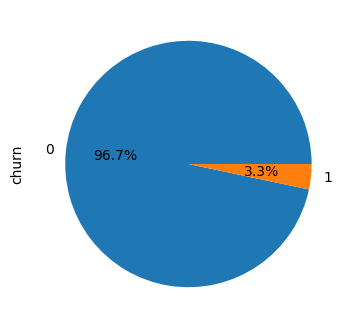

In [180]:
plt.figure(figsize=[5,4])

hv_cust_df['churn'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
plt.show()

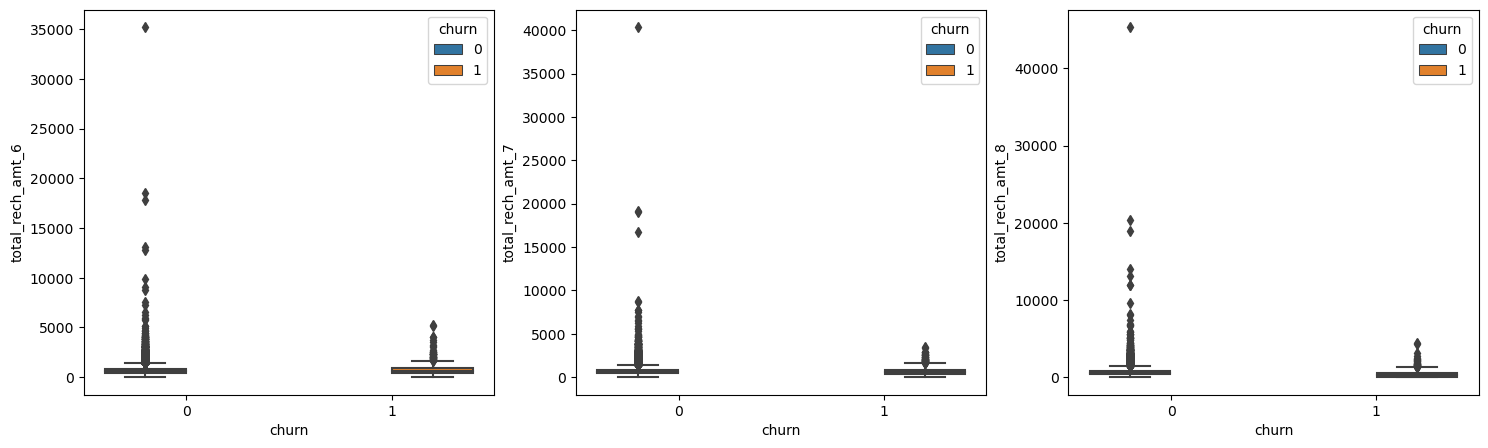

In [35]:
plt.figure(figsize=[18,5])

rech_amt =['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8']
i=1

for col in rech_amt:
    plt.subplot(1,3,i)
    sns.boxplot(x=hv_cust_df['churn'],y=hv_cust_df[col],hue=hv_cust_df['churn'])
    i+=1
    
plt.show()

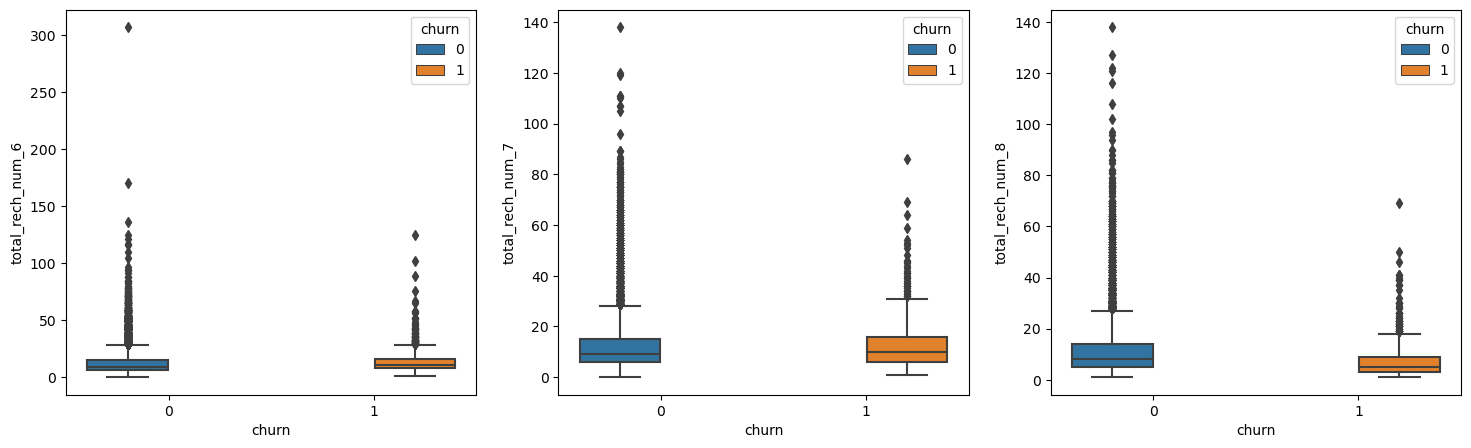

In [36]:
plt.figure(figsize=[18,5])

rech_num =['total_rech_num_6','total_rech_num_7','total_rech_num_8']
i=1

for col in rech_num:
    plt.subplot(1,3,i)
    sns.boxplot(x=hv_cust_df['churn'],y=hv_cust_df[col],hue=hv_cust_df['churn'])
    i+=1
    
plt.show()

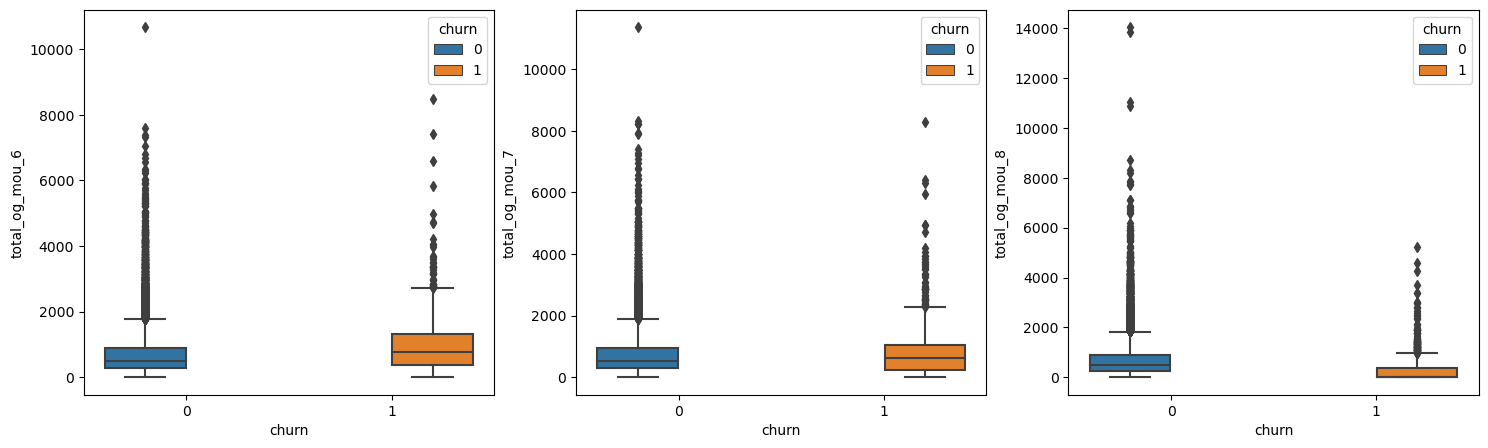

In [37]:
plt.figure(figsize=[18,5])

og_mou =['total_og_mou_6','total_og_mou_7','total_og_mou_8']
i=1

for col in og_mou:
    plt.subplot(1,3,i)
    sns.boxplot(x=hv_cust_df['churn'],y=hv_cust_df[col],hue=hv_cust_df['churn'])
    i+=1
    
plt.show()

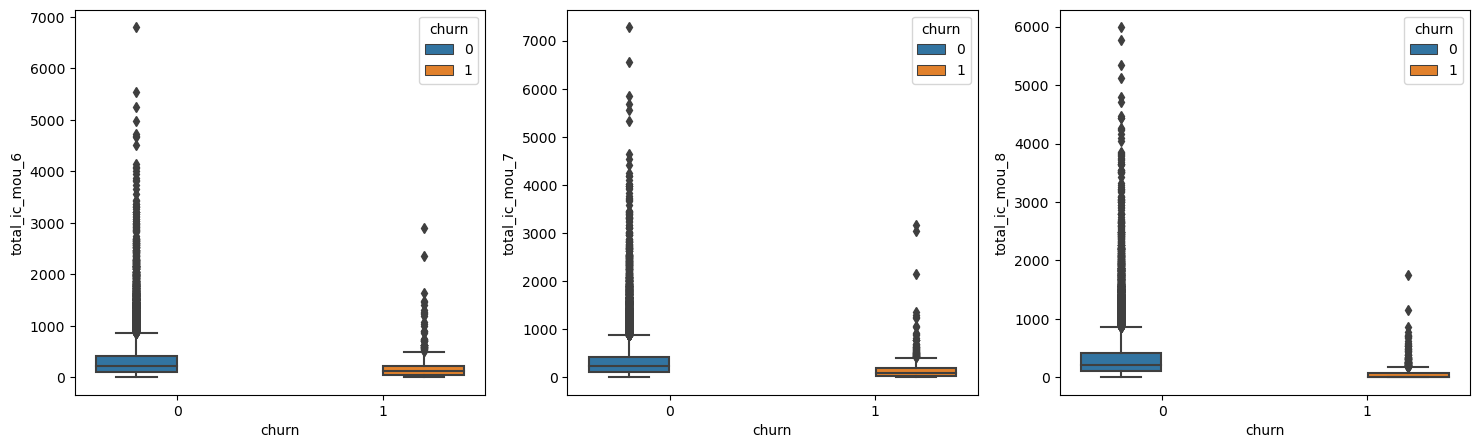

In [38]:
plt.figure(figsize=[18,5])

ic_mou =['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8']
i=1

for col in ic_mou:
    plt.subplot(1,3,i)
    sns.boxplot(x=hv_cust_df['churn'],y=hv_cust_df[col],hue=hv_cust_df['churn'])
    i+=1
    
plt.show()

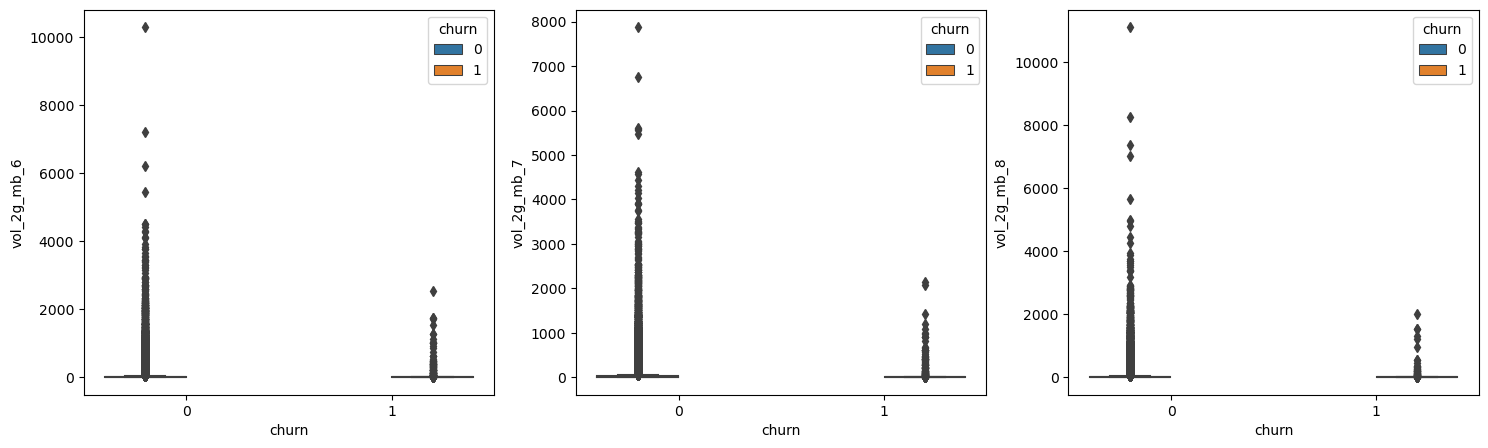

In [39]:
plt.figure(figsize=[18,5])

vol_2g =['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8']
i=1

for col in vol_2g:
    plt.subplot(1,3,i)
    sns.boxplot(x=hv_cust_df['churn'],y=hv_cust_df[col],hue=hv_cust_df['churn'])
    i+=1
    
plt.show()

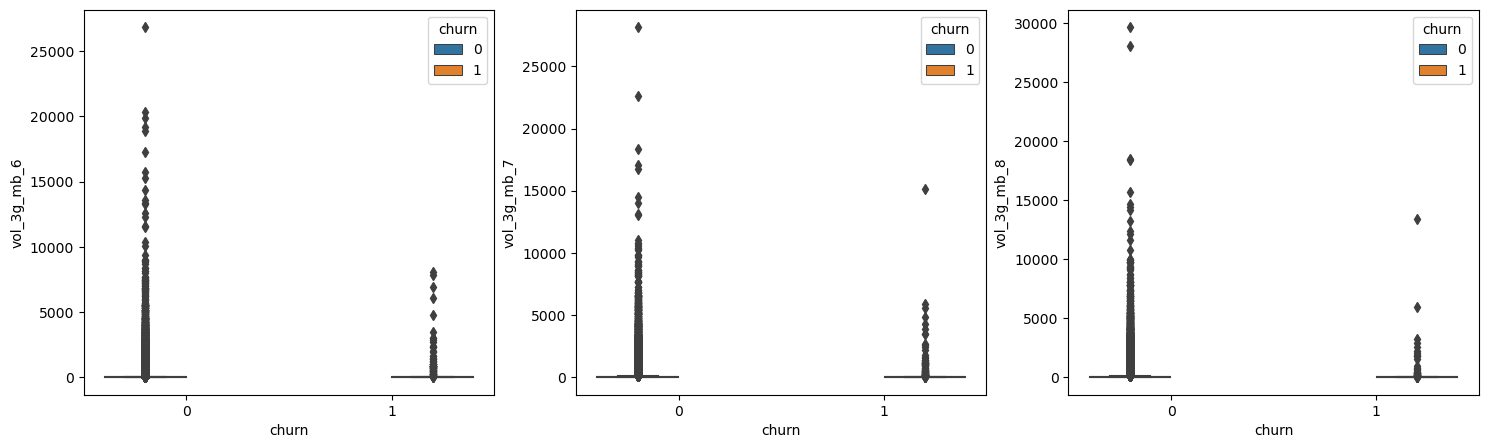

In [40]:
plt.figure(figsize=[18,5])

vol_3g =['vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8']
i=1

for col in vol_3g:
    plt.subplot(1,3,i)
    sns.boxplot(x=hv_cust_df['churn'],y=hv_cust_df[col],hue=hv_cust_df['churn'])
    i+=1
    
plt.show()

-- As we notice all the plots, the recharge amount, number of recharges, incoming and outgoing calls, data usage are comparatively very less in customers who were tagged as churned.

### Outlier Treatment

In [41]:
# List only the numeric columns
numeric_cols = hv_cust_df.select_dtypes(exclude=['object']).columns
print(numeric_cols)

Index(['mobile_number', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7',
       'offnet_mou_8',
       ...
       'total_rech_amt_6_7', 'churn', 'total_mou_6_7', 'total_mou_action_8',
       'decrease_in_mou', 'decrease_in_rech_amt', 'total_rech_num_6_7',
       'decrease_in_rech_num', 'vbc_3g_6_7', 'decrease_in_vbc_3g'],
      dtype='object', length=136)


In [42]:
# Removing outliers below 10th and above 90th percentile
for col in numeric_cols: 
    
    q1 = hv_cust_df[col].quantile(0.10)
    q3 = hv_cust_df[col].quantile(0.90)
    
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    
    new_df = hv_cust_df.loc[(hv_cust_df[col] > range_low) & (hv_cust_df[col] < range_high)]

new_df.shape

(27463, 139)

In [43]:
hv_cust_df.shape

(27463, 139)

-- For all the numeric attributes, top and below 10 percentile values have been removed as there are outliers present in almost all the numeric attributes

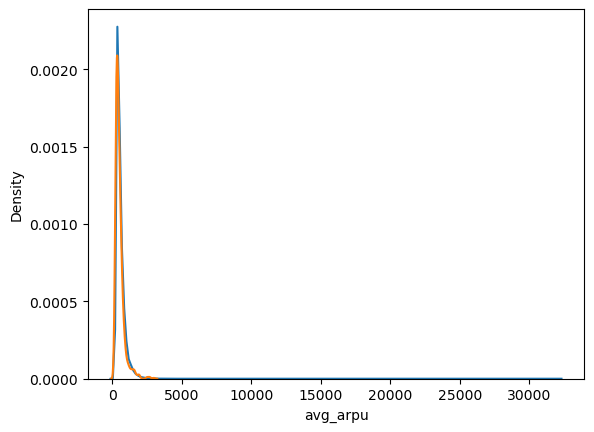

In [185]:
sns.distplot(hv_cust_df[hv_cust_df['churn']==0]['avg_arpu'],hist=False)
sns.distplot(hv_cust_df[hv_cust_df['churn']==1]['avg_arpu'],hist=False)
plt.show()

-- We can notice the change in average arpu's of customers who were tagged as chrners and non-churners.

<Figure size 1000x200 with 0 Axes>

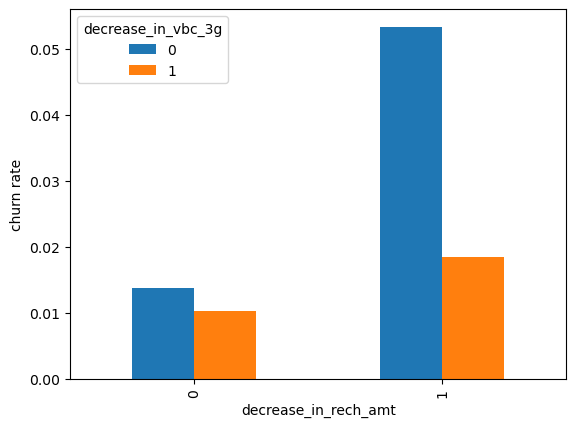

In [45]:
plt.figure(figsize=[10,2])

new_df.pivot_table(values='churn', index='decrease_in_rech_amt', columns='decrease_in_vbc_3g', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

In [379]:
# There is a huge drop in cost spent on mobile data in case of churners

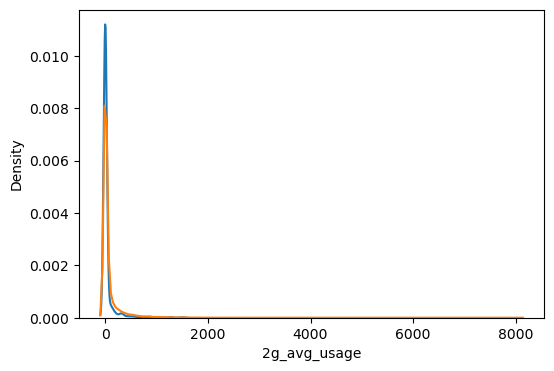

In [231]:
new_df['2g_avg_usage']=(new_df['vol_2g_mb_6']+new_df['vol_2g_mb_7']+new_df['vol_2g_mb_8'])/3

plt.figure(figsize=[6,4])
sns.distplot(new_df[new_df['churn']==1]['2g_avg_usage'],hist=False)
sns.distplot(new_df[new_df['churn']==0]['2g_avg_usage'],hist=False)
plt.show()

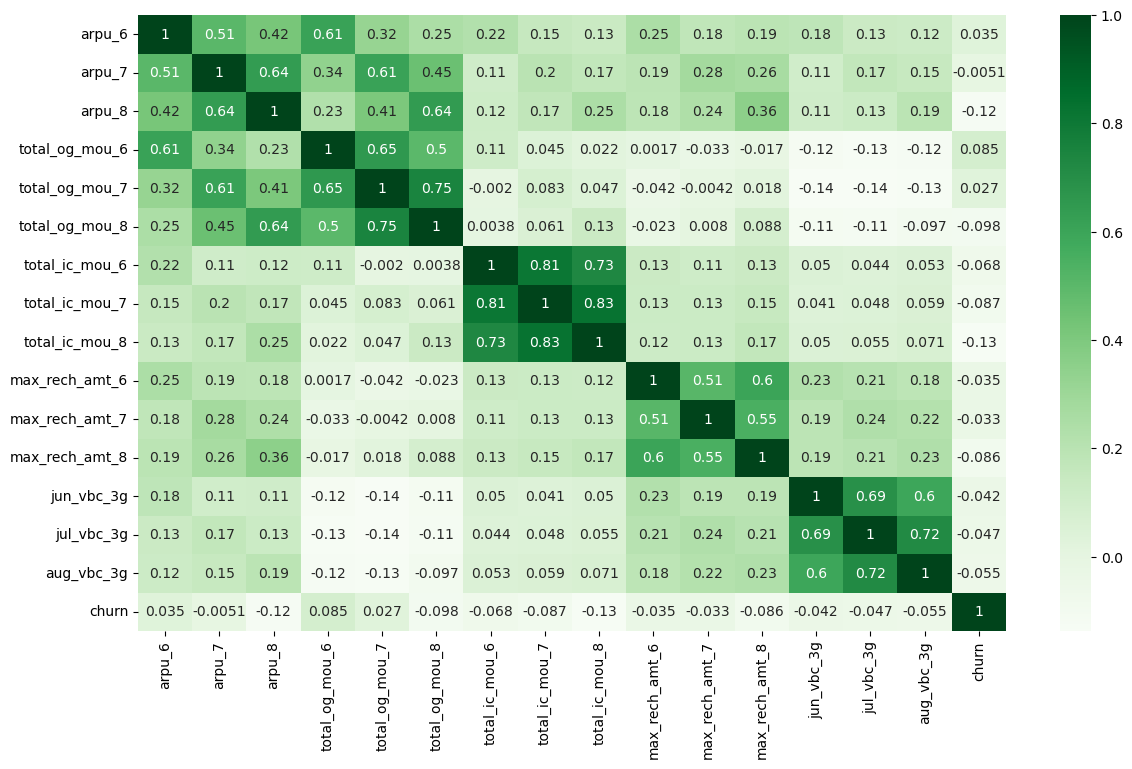

In [503]:
hmap_columns=['arpu_6','arpu_7','arpu_8','total_og_mou_6','total_og_mou_7','total_og_mou_8','total_ic_mou_6','total_ic_mou_7','total_ic_mou_8','max_rech_amt_6','max_rech_amt_7','max_rech_amt_8','jun_vbc_3g','jul_vbc_3g','aug_vbc_3g','churn']

plt.figure(figsize=[14,8])
sns.heatmap(new_df[hmap_columns].corr(),annot=True,cmap='Greens')
plt.show()

In [55]:
# Dropping the unwanted columns before splitting the dataset into train and test

new_df.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','last_day_rch_amt_6','last_day_rch_amt_7','last_day_rch_amt_8','total_rech_amt_6_7','total_rech_num_6_7','decrease_in_mou','decrease_in_rech_amt','total_rech_num_6_7','decrease_in_rech_num','vbc_3g_6_7','decrease_in_vbc_3g','avg_arpu'],axis=1,inplace=True)

### Splitting the data into Train and Test datasets

In [56]:
X=new_df.drop(['mobile_number','churn'],axis=1)

y=new_df['churn']

In [57]:
X_train,X_test,y_train,y_test = train_test_split(X, y, train_size=0.75, random_state=42 )

In [58]:
print(X_train.shape)
print(X_test.shape)

(20597, 124)
(6866, 124)


### Dealing with Data Imbalance

In [50]:
from imblearn.over_sampling import SMOTE

In [51]:
sm = SMOTE(random_state=27)

In [59]:
X_smote_train, y_smote_train = sm.fit_resample(X_train, y_train)

print(X_smote_train.shape,y_smote_train.shape)

(39828, 124) (39828,)


### Scaling of Data 

-- Scaling of Train and Test data

In [60]:
scaler = StandardScaler()

In [61]:
X_smote_train[X_smote_train.columns] = scaler.fit_transform(X_smote_train[X_smote_train.columns])

X_smote_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_mou_6_7,total_mou_action_8
0,-0.595095,-0.050212,0.495353,-0.475258,-0.138624,1.082921,-0.236239,0.454827,0.474514,4.378045,...,-0.135332,-0.132531,-0.115359,-0.509347,-0.258231,-0.266106,-0.254255,-0.113011,-0.140451,1.296288
1,0.191773,0.034604,0.107525,-0.605198,-0.530707,-0.251791,0.132556,0.045433,-0.134118,-0.265342,...,1.367737,1.230350,1.211774,-0.512869,0.198987,0.161994,0.170367,-0.113011,0.035041,0.197574
2,-0.366072,-0.588142,-0.259478,-0.499026,-0.529331,-0.282148,-0.634715,-0.676684,-0.197459,-0.265342,...,-0.135332,-0.132531,-0.115359,0.162274,-0.258231,-0.266106,-0.254255,-0.113011,-0.676526,-0.143432
3,-0.764674,-0.236066,0.220517,-0.455112,-0.234433,0.052291,-0.312645,0.140257,0.476638,-0.265342,...,-0.135332,-0.132531,-0.115359,2.211187,-0.258231,-0.266106,-0.254255,-0.113011,0.088255,0.854035
4,1.302928,0.986839,0.984646,0.289627,0.170571,0.112037,-0.031830,0.012278,0.565768,-0.201722,...,-0.135332,-0.132531,-0.115359,1.314127,-0.258231,-0.266106,-0.254255,-0.113011,0.348375,0.837001


In [62]:
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])

X_test.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_mou_6_7,total_mou_action_8
21332,0.707255,1.165764,0.878566,0.016714,0.289161,0.013260,2.104998,2.834208,3.619546,-0.265342,...,-0.135332,-0.132531,-0.115359,-0.718348,-0.258231,-0.266106,-0.254255,-0.105193,1.774670,2.048562
79662,1.047977,0.792862,0.141476,-0.651256,-0.585521,-0.374166,2.290706,1.055882,0.610151,-0.265342,...,-0.135332,-0.132531,-0.115359,-0.175885,-0.100645,0.091782,0.870584,-0.113011,1.196301,0.217528
11857,-0.069818,0.329734,0.229889,-0.110761,-0.423546,0.098012,-0.648216,-0.565846,-0.333005,-0.265342,...,-0.135332,-0.132531,-0.115359,2.010406,4.316084,3.752828,4.681837,-0.113011,0.051852,0.545240
84380,-0.137575,0.174527,-0.418758,-0.559956,-0.276097,-0.465700,0.262312,1.024349,-0.237410,-0.265342,...,-0.135332,-0.132531,-0.115359,-0.349661,-0.258231,-0.266106,-0.254255,-0.113011,0.050152,-0.570332
51772,-0.031689,-1.069027,-0.532786,0.833138,-0.597275,-0.108724,-0.669441,-0.829380,-0.537466,-0.265342,...,-0.135332,-0.132531,-0.115359,-0.813455,-0.258231,-0.266106,-0.254255,-0.113011,-0.559150,-0.445795


### Dimensionality reduction using PCA 

In [63]:
pca=PCA(random_state=42)

pca.fit(X_smote_train)

PCA(random_state=42)

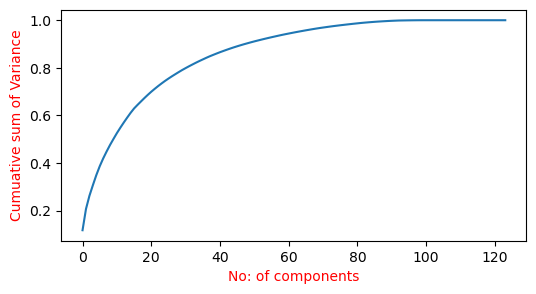

In [64]:
var_cumulative=np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=[6,3])
plt.plot(var_cumulative)
plt.xlabel('No: of components',color='red')
plt.ylabel('Cumuative sum of Variance',color='red')
plt.show()

In [65]:
var_cumulative[:60]

array([0.11805484, 0.20722512, 0.26243374, 0.30679265, 0.34921754,
       0.38669922, 0.4192918 , 0.44858351, 0.47611183, 0.50139623,
       0.52602781, 0.54868704, 0.57041168, 0.59123019, 0.61127097,
       0.62950918, 0.64445207, 0.65880411, 0.67306387, 0.68673006,
       0.69970957, 0.7118148 , 0.72345771, 0.73450598, 0.74505712,
       0.7549302 , 0.76441121, 0.77341469, 0.78231822, 0.790913  ,
       0.79894714, 0.80674456, 0.81425462, 0.82163658, 0.82865261,
       0.8353979 , 0.84210681, 0.84846629, 0.85438273, 0.86012679,
       0.86572925, 0.87099054, 0.87617399, 0.88118605, 0.88600487,
       0.89056055, 0.89499628, 0.8992407 , 0.9032905 , 0.90728934,
       0.91113974, 0.91480614, 0.91837856, 0.92188107, 0.92530028,
       0.92863278, 0.93187901, 0.93511062, 0.93826801, 0.94124685])

In [186]:
# As we see the above scree plot and cumulative variances, we understand that 94% of variance in the data is explained by 60 variables. 
# Hence , we will perform PCA with 60 variables

In [67]:
# Instantiate PCA with 60 components

pca_final = IncrementalPCA(n_components=60)

In [68]:
X_pca_train = pca_final.fit_transform(X_smote_train)

X_test_pca = pca_final.transform(X_test)

##### -- As mentioned in the business statement it is more important to identify churners than the non-churners accurately. The company is more focused in retaining the churners.
##### -- Hence, Accuracy is the not the right measure. SENSITIVITY / RECALL is right metric to evaluate the model. Objective is to have a model with high Sensitivity values

### Model Building 

#### 1. Logistic Regression using PCA 

In [69]:
lr=LogisticRegression()

In [70]:
lr.fit(X_pca_train,y_smote_train)

LogisticRegression()

In [71]:
y_train_pred=lr.predict(X_pca_train)

In [72]:
confusion = metrics.confusion_matrix(y_smote_train, y_train_pred)
print(confusion)

[[16503  3411]
 [ 2035 17879]]


In [73]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [74]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_smote_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.863262026714874
Sensitivity:- 0.8978105855177262
Specificity:- 0.8287134679120217


In [75]:
y_test_pred=lr.predict(X_test_pca)

In [76]:
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

[[5456 1182]
 [  51  177]]


In [77]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8204194581998252
Sensitivity:- 0.7763157894736842
Specificity:- 0.8219343175655318


--Train Data Metrics

Accuracy - 0.863262026714874

Sensitivity - 0.8978105855177262

Specificity - 0.8287134679120217
    
-----------------------------------

--Test Data Metrics

Accuracy - 0.8204194581998252

Sensitivity - 0.7763157894736842

Specificity - 0.8219343175655318

### Decision Tree modelling with PCA

In [78]:
# Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [79]:
# Create the parameters 
params = {
    'max_depth': [3,5,10,15],
    'min_samples_leaf': [5, 10, 20 , 50],
    'min_samples_split': [10, 25, 50, 100]
}


# Instantiate the grid search model
dt = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dt, 
                           param_grid = params, 
                           scoring= 'recall',
                           cv = 4, 
                           verbose = True,
                           n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_pca_train,y_smote_train)

Fitting 4 folds for each of 64 candidates, totalling 256 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, 15],
                         'min_samples_leaf': [5, 10, 20, 50],
                         'min_samples_split': [10, 25, 50, 100]},
             scoring='recall', verbose=True)

In [80]:
# cv results
gs_results = pd.DataFrame(grid_search.cv_results_)
gs_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,1.917518,0.048621,0.019527,6.764447e-03,3,5,10,"{'max_depth': 3, 'min_samples_leaf': 5, 'min_s...",0.911209,0.919646,0.915847,0.923679,0.917595,0.004611,21
1,2.023633,0.061101,0.016427,1.108261e-03,3,5,25,"{'max_depth': 3, 'min_samples_leaf': 5, 'min_s...",0.911209,0.919646,0.915847,0.923679,0.917595,0.004611,21
2,2.393718,0.012952,0.015621,8.678567e-07,3,5,50,"{'max_depth': 3, 'min_samples_leaf': 5, 'min_s...",0.911209,0.919646,0.915847,0.923679,0.917595,0.004611,21
3,2.581019,0.046281,0.018066,8.045515e-03,3,5,100,"{'max_depth': 3, 'min_samples_leaf': 5, 'min_s...",0.911209,0.919646,0.915847,0.923679,0.917595,0.004611,21
4,2.358062,0.006764,0.019526,6.764309e-03,3,10,10,"{'max_depth': 3, 'min_samples_leaf': 10, 'min_...",0.911209,0.919646,0.915847,0.923679,0.917595,0.004611,21


In [81]:
best_est=grid_search.best_estimator_

print(best_est)

DecisionTreeClassifier(max_depth=15, min_samples_leaf=5, min_samples_split=10)


In [82]:
dt_final=DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=10, min_samples_leaf=5, min_samples_split=10)

In [83]:
dt_final.fit(X_pca_train,y_smote_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=10,
                       random_state=100)

In [84]:
y_train_pred = dt_final.predict(X_pca_train)

In [85]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_smote_train, y_train_pred)
print(confusion)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

[[17219  2695]
 [  589 19325]]


In [86]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_smote_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9175454454152857
Sensitivity:- 0.970422818117907
Specificity:- 0.8646680727126644


In [87]:
# Prediction on the test set

y_test_pred = dt_final.predict(X_test_pca)

In [88]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)


TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

[[5562 1076]
 [  75  153]]


In [89]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8323623652781823
Sensitivity:- 0.6710526315789473
Specificity:- 0.8379029828261525


----- Decision Tree model Train and Test results

--Train data results:

Accuracy - 0.9175454454152857

Sensitivity - 0.970422818117907

Specificity - 0.8646680727126644

------------------------------------------------

--Test data results:

Accuracy - 0.8323623652781823

Sensitivity - 0.6710526315789473

Specificity - 0.8379029828261525


### Random Forest using PCA

In [216]:
params = {
    'max_depth': [5, 10],
    'min_samples_leaf': [25 ,50],
    'min_samples_split': [50, 100],
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = params, 
                           cv = 3,
                           n_jobs = -1,
                           verbose = True, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_pca_train, y_smote_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10], 'max_features': [10, 20],
                         'min_samples_leaf': [25, 50],
                         'min_samples_split': [50, 100],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, verbose=True)

In [217]:
print(grid_search.best_estimator_)

print(grid_search.best_score_)


RandomForestClassifier(max_depth=10, max_features=20, min_samples_leaf=25,
                       min_samples_split=50)
0.9264336647584615


In [218]:
rf_final=RandomForestClassifier(max_depth=10, 
                                max_features=20, 
                                min_samples_leaf=25,
                                min_samples_split=50, 
                                n_estimators=300, 
                                bootstrap=True)

In [219]:
rf_final.fit(X_pca_train,y_smote_train)

RandomForestClassifier(max_depth=10, max_features=20, min_samples_leaf=25,
                       min_samples_split=50, n_estimators=300)

In [220]:
X_new=pd.DataFrame(X_pca_train)
X_new.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,1.429578,0.681328,-0.840907,-0.633696,0.464959,-0.470613,-3.160427,0.521884,-1.167774,-2.447421,...,-0.694705,-0.306951,-0.386075,-0.052803,-0.282049,-0.650832,0.047420,0.050096,0.034618,0.322305
1,2.307573,-2.299326,1.070122,2.054909,-0.595007,-0.541768,0.791416,-0.845245,-0.313632,-0.240614,...,0.283750,-0.475236,-0.101579,-0.177453,0.221493,-0.251532,-0.213346,0.221411,-0.250868,-0.798512
2,-1.036392,-2.080195,-1.498452,-0.177699,0.144343,-0.102659,-0.489310,0.470011,0.471502,-0.843603,...,0.167433,0.056421,0.181058,-0.398189,-0.253253,0.002964,-0.080269,0.031422,-0.122197,0.271935
3,4.223704,-3.279533,-2.790263,-1.178793,1.122282,0.111752,-1.257808,-0.788003,0.181293,-0.261193,...,0.106032,-0.068592,0.128868,0.349590,-0.177624,-0.028438,-0.156111,-0.253395,-0.190644,-0.335649
4,4.325225,-0.551626,-0.437268,-0.625520,1.900193,1.105565,-0.114771,-0.414665,-0.498324,0.559757,...,0.153422,0.014377,0.134686,-0.288753,0.080398,0.558677,-0.000075,-0.137929,0.274216,0.021571


In [221]:
y_train_pred=rf_final.predict(X_pca_train)

In [222]:

confusion = metrics.confusion_matrix(y_smote_train, y_train_pred)

TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [227]:
# Accuracy
print("Accuracy -",metrics.accuracy_score(y_smote_train, y_train_pred))

# Sensitivity
print("Sensitivity -",TP / float(TP+FN))

# Specificity
print("Specificity -", TN / float(TN+FP))

Accuracy - 0.9478758662247665
Sensitivity - 0.7017543859649122
Specificity - 0.9049412473636638


In [224]:
# Prediction on the test set

y_test_pred = rf_final.predict(X_test_pca)

In [225]:
# Confusion matrix

confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

[[6007  631]
 [  68  160]]


In [228]:
# Accuracy
print("Accuracy -",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity -",TP / float(TP+FN))

# Specificity
print("Specificity -", TN / float(TN+FP))

Accuracy - 0.8981939994174192
Sensitivity - 0.7017543859649122
Specificity - 0.9049412473636638


 -- Model Metrics on Training Data

Accuracy - 0.9478758662247665

Sensitivity - 0.7017543859649122

Specificity - 0.9049412473636638

--------------------------------------------

-- Model Metrics on Test Data

Accuracy - 0.8981939994174192

Sensitivity - 0.7017543859649122

Specificity - 0.9049412473636638

-- We have prepared three models here, one using Logistic Regression, one using Decision Trees and Random Forests.

-- We have achieved highest model accuracy using Random Forests but we are more focused on sensitivity rather than other metrics.

-- We have achieved Best Sensitivity measure with simple Logistic Regression model i.e 78% on Test Data

### Logistic Regression without PCA

In [109]:
import statsmodels.api as sm

from sklearn.feature_selection import RFE

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [91]:
n1_log_reg = sm.GLM(y_smote_train, sm.add_constant(X_smote_train), family=sm.families.Binomial())

In [92]:
n1_log_reg = n1_log_reg.fit().summary()

n1_log_reg

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                39828
Model:                            GLM   Df Residuals:                    39705
Model Family:                Binomial   Df Model:                          122
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 08 May 2023   Deviance:                       24175.
Time:                        18:29:12   Pearson chi2:                 1.83e+07
No. Iterations:                    37   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -33.9270   4061.055     -0.008      0.993   -7993.448    7925.595
arpu_6                 0.1641      0.099      1.658      0.097      -0.030       0.358
arpu_7                 0.1998      0.110      1.809      0.070      -0.017       0.416
arpu_8                 0.6521      0.124      5.258      0.000       0.409       0.895
onnet_mou_6            5.8568      3.154      1.857      0.063      -0.326      12.039
onnet_mou_7            5.6816      1.903      2.986      0.003       1.952       9.411
onnet_mou_8           -3.5527      1.988     -1.787      0.074      -7.450       0.344
offnet_mou_6           6.4991      3.105      2.093      0.036       0.414      12.584
offnet_mou_7           5.0274      1.750      2.874      0.004       1.598       8.456
offnet_mou_8          -3.5109      1.991     -1.764      0.078      -7.412       0.390
roam_ic_mou_6          0.2660      0.042      6.307      0.000       0.183       0.349
roam_ic_mou_7          0.1180      0.051      2.297      0.022       0.017       0.219
roam_ic_mou_8          0.1990      0.045      4.405      0.000       0.110       0.288
roam_og_mou_6         -2.0959      1.020     -2.054      0.040      -4.096      -0.096
roam_og_mou_7         -1.7226      0.565     -3.048      0.002      -2.830      -0.615
roam_og_mou_8          1.8870      0.755      2.500      0.012       0.408       3.366
loc_og_t2t_mou_6   -1254.5403    656.745     -1.910      0.056   -2541.736      32.656
loc_og_t2t_mou_7   -1603.6837    663.499     -2.417      0.016   -2904.117    -303.250
loc_og_t2t_mou_8    6276.9774    629.084      9.978      0.000    5043.995    7509.960
loc_og_t2m_mou_6   -1314.4894    687.871     -1.911      0.056   -2662.692      33.713
loc_og_t2m_mou_7   -1579.0688    653.191     -2.417      0.016   -2859.299    -298.838
loc_og_t2m_mou_8    6738.4887    675.350      9.978      0.000    5414.827    8062.151
loc_og_t2f_mou_6    -106.5848     55.831     -1.909      0.056    -216.012       2.843
loc_og_t2f_mou_7    -132.9884     55.063     -2.415      0.016    -240.911     -25.066
loc_og_t2f_mou_8     519.6716     52.099      9.975      0.000     417.560     621.783
loc_og_t2c_mou_6      -0.1112      0.025     -4.494      0.000      -0.160      -0.063
loc_og_t2c_mou_7      -0.1620      0.027     -6.060      0.000      -0.214      -0.110
loc_og_t2c_mou_8       0.1690      0.027      6.361      0.000       0.117       0.221
loc_og_mou_6       -1416.9327   1303.639     -1.087      0.277   -3972.018    1138.153
loc_og_mou_7        6793.0388   1317.050      5.158      0.000    4211.669    9374.409
loc_og_mou_8       -1238.3798   1354.730     -0.914      0.361   -3893.602    1416.842
std_og_t2t_mou_6   -1.246e+04   1913.035     -6.512      0.000   -1.62e+04   -8708.217
std_og_t2t_mou_7   -1.474e+04   1882.0

-- As the dataset contains multiple variables and many of those have a high p-value, we cannot drop them manually. 

It is feasible to use automated approach for feature selection.

In [105]:
n2_log_reg = LogisticRegression()

In [106]:
rfe = RFE(estimator = n2_log_reg, n_features_to_select = 20)

rfe.fit(X_smote_train, y_smote_train)

RFE(estimator=LogisticRegression(), n_features_to_select=20)

In [107]:
rfe_cols = X_smote_train.columns[rfe.support_]

rfe_cols

Index(['onnet_mou_7', 'roam_og_mou_8', 'loc_og_mou_8', 'std_og_t2m_mou_7',
       'isd_og_mou_6', 'isd_og_mou_8', 'og_others_7', 'og_others_8',
       'loc_ic_t2t_mou_8', 'loc_ic_t2f_mou_8', 'ic_others_8',
       'total_rech_num_8', 'vol_3g_mb_7', 'monthly_2g_6', 'monthly_2g_8',
       'monthly_3g_6', 'monthly_3g_8', 'sachet_3g_8', 'sep_vbc_3g',
       'total_mou_action_8'],
      dtype='object')

In [108]:
X_rfe_train = X_smote_train[rfe_cols]

log_reg_m1 = sm.GLM(y_smote_train, sm.add_constant(X_rfe_train), family= sm.families.Binomial())

log_reg_m1 = log_reg_m1.fit().summary()

log_reg_m1

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                39828
Model:                            GLM   Df Residuals:                    39807
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 08 May 2023   Deviance:                       27919.
Time:                        18:50:13   Pearson chi2:                 8.80e+06
No. Iterations:                    40   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -36.7504   4098.797     -0.009      0.993   -8070.244    7996.743
onnet_mou_7            0.7752      0.023     34.240      0.000       0.731       0.820
roam_og_mou_8          0.9088      0.035     26.297      0.000       0.841       0.977
loc_og_mou_8          -1.1361      0.047    -24.281      0.000      -1.228      -1.044
std_og_t2m_mou_7       0.7173      0.021     33.606      0.000       0.675       0.759
isd_og_mou_6           0.9019      0.098      9.209      0.000       0.710       1.094
isd_og_mou_8          -1.9959      0.203     -9.847      0.000      -2.393      -1.599
og_others_7           -0.6289      0.601     -1.046      0.295      -1.807       0.549
og_others_8        -2771.2457   3.19e+05     -0.009      0.993   -6.27e+05    6.22e+05
loc_ic_t2t_mou_8      -0.6777      0.063    -10.732      0.000      -0.801      -0.554
loc_ic_t2f_mou_8      -1.3278      0.074    -17.947      0.000      -1.473      -1.183
ic_others_8           -1.4243      0.129    -11.079      0.000      -1.676      -1.172
total_rech_num_8      -0.4214      0.020    -21.399      0.000      -0.460      -0.383
vol_3g_mb_7            0.4596      0.029     16.095      0.000       0.404       0.516
monthly_2g_6          -0.6910      0.039    -17.936      0.000      -0.767      -0.616
monthly_2g_8          -0.7504      0.047    -15.966      0.000      -0.842      -0.658
monthly_3g_6          -0.6690      0.042    -15.838      0.000      -0.752      -0.586
monthly_3g_8          -1.3951      0.085    -16.472      0.000      -1.561      -1.229
sachet_3g_8           -0.4558      0.042    -10.792      0.000      -0.539      -0.373
sep_vbc_3g            -0.5173      0.043    -12.149      0.000      -0.601      -0.434
total_mou_action_8    -1.1420      0.036    -31.565      0.000      -1.213      -1.071
======================================================================================
"""

In [110]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_rfe_train.columns
vif['VIF'] = [variance_inflation_factor(X_rfe_train.values, i) for i in range(X_rfe_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,isd_og_mou_8,12.89
4,isd_og_mou_6,12.87
19,total_mou_action_8,3.03
2,loc_og_mou_8,1.80
16,monthly_3g_8,1.75
15,monthly_3g_6,1.75
12,vol_3g_mb_7,1.64
13,monthly_2g_6,1.48
14,monthly_2g_8,1.47
11,total_rech_num_8,1.38


-- The attribute 'og_others_8' has high p-value and hence we drop the attribute.

In [111]:
temp_cols = rfe_cols.to_list()

temp_cols.remove('og_others_8')

In [115]:
# Model -2

In [113]:
X_rfe_train = X_smote_train[temp_cols]

log_reg_m2 = sm.GLM(y_smote_train, sm.add_constant(X_rfe_train), family= sm.families.Binomial())

log_reg_m2 = log_reg_m2.fit().summary()

log_reg_m2

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                39828
Model:                            GLM   Df Residuals:                    39808
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13986.
Date:                Mon, 08 May 2023   Deviance:                       27973.
Time:                        19:23:23   Pearson chi2:                 9.22e+06
No. Iterations:                    11   Pseudo R-squ. (CS):             0.4954
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.1032      0.033    -33.403      0.000      -1.168      -1.039
onnet_mou_7            0.7746      0.023     34.258      0.000       0.730       0.819
roam_og_mou_8          0.9095      0.034     26.493      0.000       0.842       0.977
loc_og_mou_8          -1.1383      0.047    -24.326      0.000      -1.230      -1.047
std_og_t2m_mou_7       0.7158      0.021     33.596      0.000       0.674       0.758
isd_og_mou_6           0.9086      0.098      9.276      0.000       0.717       1.101
isd_og_mou_8          -2.0191      0.202     -9.974      0.000      -2.416      -1.622
og_others_7           -1.1332      0.610     -1.858      0.063      -2.329       0.062
loc_ic_t2t_mou_8      -0.6773      0.063    -10.733      0.000      -0.801      -0.554
loc_ic_t2f_mou_8      -1.3285      0.074    -17.958      0.000      -1.473      -1.183
ic_others_8           -1.4280      0.129    -11.095      0.000      -1.680      -1.176
total_rech_num_8      -0.4240      0.020    -21.549      0.000      -0.463      -0.385
vol_3g_mb_7            0.4617      0.028     16.221      0.000       0.406       0.518
monthly_2g_6          -0.6935      0.039    -17.984      0.000      -0.769      -0.618
monthly_2g_8          -0.7540      0.047    -16.011      0.000      -0.846      -0.662
monthly_3g_6          -0.6691      0.042    -15.841      0.000      -0.752      -0.586
monthly_3g_8          -1.3969      0.085    -16.485      0.000      -1.563      -1.231
sachet_3g_8           -0.4634      0.042    -10.925      0.000      -0.547      -0.380
sep_vbc_3g            -0.5173      0.043    -12.151      0.000      -0.601      -0.434
total_mou_action_8    -1.1399      0.036    -31.539      0.000      -1.211      -1.069
======================================================================================
"""

-- The attribute 'og_others_7' has high p-value and hence we drop the attribute.

In [117]:
temp_cols.remove('og_others_7')

In [118]:
# Model-3

X_rfe_train = X_smote_train[temp_cols]

log_reg_m3 = sm.GLM(y_smote_train, sm.add_constant(X_rfe_train), family= sm.families.Binomial())

log_reg_m3 = log_reg_m3.fit().summary()

log_reg_m3

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                39828
Model:                            GLM   Df Residuals:                    39809
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14000.
Date:                Mon, 08 May 2023   Deviance:                       27999.
Time:                        19:31:29   Pearson chi2:                 8.54e+06
No. Iterations:                     9   Pseudo R-squ. (CS):             0.4950
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.0897      0.032    -34.121      0.000      -1.152      -1.027
onnet_mou_7            0.7758      0.023     34.322      0.000       0.732       0.820
roam_og_mou_8          0.9037      0.034     26.428      0.000       0.837       0.971
loc_og_mou_8          -1.1378      0.047    -24.321      0.000      -1.229      -1.046
std_og_t2m_mou_7       0.7173      0.021     33.677      0.000       0.676       0.759
isd_og_mou_6           0.9041      0.098      9.245      0.000       0.712       1.096
isd_og_mou_8          -2.0099      0.202     -9.952      0.000      -2.406      -1.614
loc_ic_t2t_mou_8      -0.6760      0.063    -10.716      0.000      -0.800      -0.552
loc_ic_t2f_mou_8      -1.3292      0.074    -17.965      0.000      -1.474      -1.184
ic_others_8           -1.4314      0.129    -11.118      0.000      -1.684      -1.179
total_rech_num_8      -0.4233      0.020    -21.533      0.000      -0.462      -0.385
vol_3g_mb_7            0.4594      0.028     16.139      0.000       0.404       0.515
monthly_2g_6          -0.6928      0.039    -17.971      0.000      -0.768      -0.617
monthly_2g_8          -0.7525      0.047    -15.993      0.000      -0.845      -0.660
monthly_3g_6          -0.6659      0.042    -15.804      0.000      -0.749      -0.583
monthly_3g_8          -1.4025      0.085    -16.494      0.000      -1.569      -1.236
sachet_3g_8           -0.4618      0.042    -10.899      0.000      -0.545      -0.379
sep_vbc_3g            -0.5159      0.043    -12.130      0.000      -0.599      -0.433
total_mou_action_8    -1.1420      0.036    -31.605      0.000      -1.213      -1.071
======================================================================================
"""

In [119]:
vif = pd.DataFrame()
vif['Features'] = X_rfe_train.columns
vif['VIF'] = [variance_inflation_factor(X_rfe_train.values, i) for i in range(X_rfe_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,isd_og_mou_8,12.88
4,isd_og_mou_6,12.87
17,total_mou_action_8,3.03
2,loc_og_mou_8,1.80
14,monthly_3g_8,1.75
13,monthly_3g_6,1.75
10,vol_3g_mb_7,1.64
11,monthly_2g_6,1.48
12,monthly_2g_8,1.47
9,total_rech_num_8,1.38


-- The attribute 'isd_og_mou_8' has high VIF value and hence we drop the attribute.

In [121]:
temp_cols.remove('isd_og_mou_8')

In [122]:
# Model-4

X_rfe_train = X_smote_train[temp_cols]

log_reg_m4 = sm.GLM(y_smote_train, sm.add_constant(X_rfe_train), family= sm.families.Binomial())

log_reg_m4 = log_reg_m4.fit().summary()

log_reg_m4

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                39828
Model:                            GLM   Df Residuals:                    39810
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14070.
Date:                Mon, 08 May 2023   Deviance:                       28141.
Time:                        19:35:23   Pearson chi2:                 3.01e+06
No. Iterations:                     9   Pseudo R-squ. (CS):             0.4933
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.0473      0.031    -33.448      0.000      -1.109      -0.986
onnet_mou_7            0.7843      0.023     34.743      0.000       0.740       0.829
roam_og_mou_8          0.8727      0.034     25.739      0.000       0.806       0.939
loc_og_mou_8          -1.1206      0.046    -24.126      0.000      -1.212      -1.030
std_og_t2m_mou_7       0.7217      0.021     33.921      0.000       0.680       0.763
isd_og_mou_6           0.0371      0.038      0.985      0.325      -0.037       0.111
loc_ic_t2t_mou_8      -0.6542      0.063    -10.442      0.000      -0.777      -0.531
loc_ic_t2f_mou_8      -1.3188      0.074    -17.904      0.000      -1.463      -1.174
ic_others_8           -1.4317      0.128    -11.156      0.000      -1.683      -1.180
total_rech_num_8      -0.4293      0.020    -21.892      0.000      -0.468      -0.391
vol_3g_mb_7            0.4514      0.028     15.937      0.000       0.396       0.507
monthly_2g_6          -0.6899      0.038    -17.919      0.000      -0.765      -0.614
monthly_2g_8          -0.7512      0.047    -15.996      0.000      -0.843      -0.659
monthly_3g_6          -0.6662      0.042    -15.839      0.000      -0.749      -0.584
monthly_3g_8          -1.3794      0.084    -16.508      0.000      -1.543      -1.216
sachet_3g_8           -0.4559      0.042    -10.841      0.000      -0.538      -0.373
sep_vbc_3g            -0.5072      0.042    -11.950      0.000      -0.590      -0.424
total_mou_action_8    -1.1545      0.036    -31.945      0.000      -1.225      -1.084
======================================================================================
"""

In [123]:
vif = pd.DataFrame()
vif['Features'] = X_rfe_train.columns
vif['VIF'] = [variance_inflation_factor(X_rfe_train.values, i) for i in range(X_rfe_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,total_mou_action_8,3.03
2,loc_og_mou_8,1.80
13,monthly_3g_8,1.75
12,monthly_3g_6,1.75
9,vol_3g_mb_7,1.64
10,monthly_2g_6,1.48
11,monthly_2g_8,1.47
8,total_rech_num_8,1.38
3,std_og_t2m_mou_7,1.38
0,onnet_mou_7,1.32


-- The attribute 'isd_og_mou_6' has high VIF value and hence we drop the attribute.

In [124]:
temp_cols.remove('isd_og_mou_6')

In [130]:
# Model-5

X_rfe_train = X_smote_train[temp_cols]

log_reg_m5 = sm.GLM(y_smote_train, sm.add_constant(X_rfe_train), family= sm.families.Binomial())

log_reg_m5 = log_reg_m5.fit()

log_reg_m5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                39828
Model:                            GLM   Df Residuals:                    39811
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14071.
Date:                Mon, 08 May 2023   Deviance:                       28142.
Time:                        19:43:27   Pearson chi2:                 3.01e+06
No. Iterations:                     9   Pseudo R-squ. (CS):             0.4932
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.0474      0.031    -33.453      0.000      -1.109      -0.986
onnet_mou_7            0.7833      0.023     34.749      0.000       0.739       0.827
roam_og_mou_8          0.8727      0.034     25.741      0.000       0.806       0.939
loc_og_mou_8          -1.1209      0.046    -24.133      0.000      -1.212      -1.030
std_og_t2m_mou_7       0.7208      0.021     33.926      0.000       0.679       0.762
loc_ic_t2t_mou_8      -0.6537      0.063    -10.433      0.000      -0.777      -0.531
loc_ic_t2f_mou_8      -1.3175      0.074    -17.893      0.000      -1.462      -1.173
ic_others_8           -1.4313      0.128    -11.154      0.000      -1.683      -1.180
total_rech_num_8      -0.4291      0.020    -21.881      0.000      -0.468      -0.391
vol_3g_mb_7            0.4513      0.028     15.937      0.000       0.396       0.507
monthly_2g_6          -0.6900      0.038    -17.922      0.000      -0.765      -0.615
monthly_2g_8          -0.7513      0.047    -15.998      0.000      -0.843      -0.659
monthly_3g_6          -0.6662      0.042    -15.844      0.000      -0.749      -0.584
monthly_3g_8          -1.3791      0.084    -16.507      0.000      -1.543      -1.215
sachet_3g_8           -0.4559      0.042    -10.846      0.000      -0.538      -0.373
sep_vbc_3g            -0.5072      0.042    -11.948      0.000      -0.590      -0.424
total_mou_action_8    -1.1536      0.036    -31.935      0.000      -1.224      -1.083
======================================================================================
"""

In [131]:
vif = pd.DataFrame()
vif['Features'] = X_rfe_train.columns
vif['VIF'] = [variance_inflation_factor(X_rfe_train.values, i) for i in range(X_rfe_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,total_mou_action_8,3.01
2,loc_og_mou_8,1.80
11,monthly_3g_6,1.75
12,monthly_3g_8,1.75
8,vol_3g_mb_7,1.64
9,monthly_2g_6,1.48
10,monthly_2g_8,1.47
3,std_og_t2m_mou_7,1.38
7,total_rech_num_8,1.38
0,onnet_mou_7,1.31


-- We consider this as the final model as no variable has high p-value and high VIF values

#### Model Evaluation 

In [132]:
# Getting the predicted value on the train set

X_train_m5 = sm.add_constant(X_rfe_train[temp_cols])

y_train_pred_lr = log_reg_m5.predict(X_train_m5)
y_train_pred_lr.head()

0    0.021750
1    0.015502
2    0.300930
3    0.002671
4    0.029680
dtype: float64

In [133]:
y_train_pred_final = pd.DataFrame({'churn':y_smote_train.values, 'churn_prob':y_train_pred_lr.values})


y_train_pred_final['CustID'] = y_train_pred_final.index

y_train_pred_final.head()

,churn,churn_prob,CustID
0,0,0.021750,0
1,0,0.015502,1
2,0,0.300930,2
3,0,0.002671,3
4,0,0.029680,4


#### ROC Curve 

In [174]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

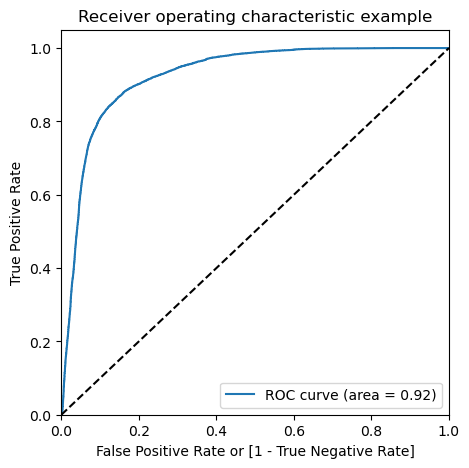

In [173]:
draw_roc(y_train_pred_final['churn'], y_train_pred_final['churn_prob'])

In [134]:
# Creating columns for different probablity cutoffs
prob_cutoff = [float(p/10) for p in range(10)]

for i in prob_cutoff:
    y_train_pred_final[i] = y_train_pred_final['churn_prob'].map(lambda x : 1 if x > i else 0)
    
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.021750,0,1,0,0,0,0,0,0,0,0,0
1,0,0.015502,1,1,0,0,0,0,0,0,0,0,0
2,0,0.300930,2,1,1,1,1,0,0,0,0,0,0
3,0,0.002671,3,1,0,0,0,0,0,0,0,0,0
4,0,0.029680,4,1,0,0,0,0,0,0,0,0,0


In [135]:

cutoff_df = pd.DataFrame(columns=['probability', 'accuracy', 'sensitivity', 'specificity'])

for i in prob_cutoff:
    cm1 = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)
    

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.500000     1.000000     0.000000
0.1          0.1  0.756955     0.985488     0.528422
0.2          0.2  0.797479     0.970674     0.624284
0.3          0.3  0.822261     0.947474     0.697047
0.4          0.4  0.840841     0.921713     0.759968
0.5          0.5  0.855403     0.893492     0.817314
0.6          0.6  0.858492     0.849804     0.867179
0.7          0.7  0.847243     0.782465     0.912022
0.8          0.8  0.785427     0.622075     0.948780
0.9          0.9  0.642889     0.309782     0.975997


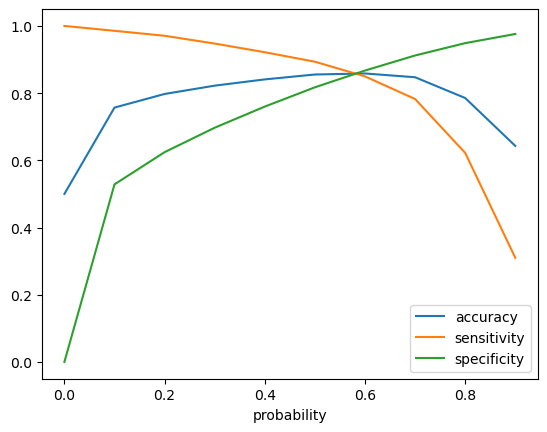

In [136]:
# Plotting accuracy, sensitivity and specificity for different probabilities.
cutoff_df.plot('probability', ['accuracy','sensitivity','specificity'])
plt.show()

-- From the above curve, we choose the optimal cut-off value as 0.6

In [157]:
# Creating a column with name "predicted", which is the predicted value for 0.6 cutoff 

y_train_pred_final['predicted'] = y_train_pred_final['churn_prob'].map(lambda x: 1 if x > 0.6 else 0)
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
0,0,0.021750,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.015502,1,1,0,0,0,0,0,0,0,0,0,0
2,0,0.300930,2,1,1,1,1,0,0,0,0,0,0,0
3,0,0.002671,3,1,0,0,0,0,0,0,0,0,0,0
4,0,0.029680,4,1,0,0,0,0,0,0,0,0,0,0


In [158]:
# Confusion metrics
confusion = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final['predicted'])
print(confusion)


TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

[[17269  2645]
 [ 2991 16923]]


In [163]:

print("Accuracy -",metrics.accuracy_score(y_train_pred_final['churn'], y_train_pred_final['predicted']))


print("Sensitivity -",TP / float(TP+FN))


print("Specificity -", TN / float(TN+FP))

Accuracy - 0.8584915135080847
Sensitivity - 0.7412280701754386
Specificity - 0.867731244350708


#### Evaluating the model on Test data set 

In [142]:
X_test_m5 = X_test[temp_cols]

X_test_m5 = sm.add_constant(X_test_m5)

In [144]:
y_test_pred_lr = log_reg_m5.predict(X_test_m5)

In [146]:
# Making y_test_pred a dataframe as y_test_pred is an array

y_test_pred1 = pd.DataFrame(y_test_pred_lr)

y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
21332,0
79662,0
11857,0
84380,1
51772,0


In [147]:
y_test_df['CustID'] = y_test_df.index

In [150]:
y_test_pred1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [151]:
#Concating the y_test_pred1 and y_test_df dataframes which contain predicted and True values on Test se.

y_test_pred_final = pd.concat([y_test_df, y_test_pred1], axis=1)

In [ ]:
y_test_pred_final = y_test_pred_final.rename(columns={0:'churn_prob'})

In [153]:
y_test_pred_final.head()

,churn,CustID,churn_prob
0,0,21332,0.451983
1,0,79662,0.014544
2,0,11857,0.000002
3,1,84380,0.500473
4,0,51772,0.573327


In [168]:
# Using Cut-off probability of 0.6

y_test_pred_final['test_predicted'] = y_test_pred_final['churn_prob'].map(lambda x: 1 if x > 0.6 else 0)

In [169]:
confusion = metrics.confusion_matrix(y_test_pred_final['churn'], y_test_pred_final['test_predicted'])
print(confusion)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

[[5760  878]
 [  59  169]]


In [170]:
# Accuracy
print("Accuracy -",metrics.accuracy_score(y_test_pred_final['churn'], y_test_pred_final['test_predicted']))

# Sensitivity
print("Sensitivity -",TP / float(TP+FN))

# Specificity
print("Specificity -", TN / float(TN+FP))

Accuracy - 0.863530439848529
Sensitivity - 0.7412280701754386
Specificity - 0.867731244350708


--Train Data set Evaluation Metrics

Accuracy - 0.858

Sensitivity - 0.741

Specificity - 0.867

-- Test Data set Evaluation Metrics

Accuracy - 0.863

Sensitivity - 0.741

Specificity - 0.87

In [187]:
log_reg_m5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                39828
Model:                            GLM   Df Residuals:                    39811
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14071.
Date:                Mon, 08 May 2023   Deviance:                       28142.
Time:                        23:27:30   Pearson chi2:                 3.01e+06
No. Iterations:                     9   Pseudo R-squ. (CS):             0.4932
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.0474      0.031    -33.453      0.000      -1.109      -0.986
onnet_mou_7            0.7833      0.023     34.749      0.000       0.739       0.827
roam_og_mou_8          0.8727      0.034     25.741      0.000       0.806       0.939
loc_og_mou_8          -1.1209      0.046    -24.133      0.000      -1.212      -1.030
std_og_t2m_mou_7       0.7208      0.021     33.926      0.000       0.679       0.762
loc_ic_t2t_mou_8      -0.6537      0.063    -10.433      0.000      -0.777      -0.531
loc_ic_t2f_mou_8      -1.3175      0.074    -17.893      0.000      -1.462      -1.173
ic_others_8           -1.4313      0.128    -11.154      0.000      -1.683      -1.180
total_rech_num_8      -0.4291      0.020    -21.881      0.000      -0.468      -0.391
vol_3g_mb_7            0.4513      0.028     15.937      0.000       0.396       0.507
monthly_2g_6          -0.6900      0.038    -17.922      0.000      -0.765      -0.615
monthly_2g_8          -0.7513      0.047    -15.998      0.000      -0.843      -0.659
monthly_3g_6          -0.6662      0.042    -15.844      0.000      -0.749      -0.584
monthly_3g_8          -1.3791      0.084    -16.507      0.000      -1.543      -1.215
sachet_3g_8           -0.4559      0.042    -10.846      0.000      -0.538      -0.373
sep_vbc_3g            -0.5072      0.042    -11.948      0.000      -0.590      -0.424
total_mou_action_8    -1.1536      0.036    -31.935      0.000      -1.224      -1.083
======================================================================================
"""

### Feature Importances 

In [197]:
final_lr = LogisticRegression()

final_lr.fit(X_train_m5, y_smote_train)

LogisticRegression()

In [206]:
feature_imps = pd.DataFrame(data={'Attribute':X_train_m5.columns, 'Importances':final_lr.coef_[0]})

feature_imp_sort=feature_imps.sort_values(by='Importances',ascending=False)

feature_imp_sort

,Attribute,Importances
2,roam_og_mou_8,0.871391
1,onnet_mou_7,0.782770
4,std_og_t2m_mou_7,0.719992
9,vol_3g_mb_7,0.448594
0,const,-0.004911
8,total_rech_num_8,-0.429036
14,sachet_3g_8,-0.453612
15,sep_vbc_3g,-0.505842
5,loc_ic_t2t_mou_8,-0.653613
12,monthly_3g_6,-0.665106


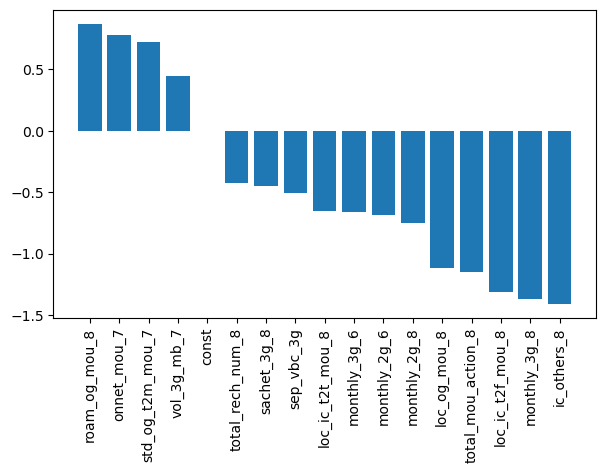

In [214]:
plt.figure(figsize=[7,4])

plt.bar(x=feature_imp_sort['Attribute'],height=feature_imp_sort['Importances'])
plt.xticks(rotation='90')
plt.show()

-- The above plot shows us the importance of features through their model coefficients. 
   Most of the attributes have negative coefficients.

-- Attributes positively correlated with Target Variable

    roam_og_mou_8

    onnet_mou_7

    std_og_t2m_mou_7

-- Attributes Negatively correlated with Target Variable

    total_mou_action_8

    loc_ic_t2f_mou_8

    monthly_3g_8

    ic_others_8

** Negatively Correlated means that as the value of attribute decreases, the probability of customer churning increases.


### Recommendations 

1. Customer whose incoming calls in the month of August i.e.'ic_others_8' has reduced should be kept in focus as they are more likely to churn.
      
   
2. In the similar fashion, Customers whose 3G data usage has come down in the month of August should be targeted. 


3. Target the customers whose minutes of usage of incoming and outgoing calls have decreased in August.


4. All the attributes related to data usage help track the behaviour of customer. Attributes such as monthly_2g_6, monthly_2g_8, monthly_3g_6 have negative coefficients. As the values of these attributes reduces, they result in increase of churn probability.


5. ' roam_og_mou_8 ' has high positive coefficient. The customers whose roaming outgoing minutes of usage is more, they are more likely to churn. This might be due to customer moving to a different state and leaving out on the old number and switv=ching to a new network.


6. Increase in 'vol_3g_mb_7' is resulting in churning of customers. The customers whose usage of 3g data is more are likely to churn. Company should look into the volume of data offered for paid price and check if it is in the similar range with the competitors .